In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]
train_directory='C:/Users/Asus/Documents/python/output/train'
test_directory='C:/Users/Asus/Documents/python/output/val'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('C:/Users/Asus/Documents/python/output/train/*')
len(folders)

332

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 35163 images belonging to 332 classes.


In [13]:
test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 8952 images belonging to 332 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Asus\AppData\Local\Temp/ipykernel_7224/2336048694.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
2198/2198 [==============================] - 576s 258ms/step - loss: 40.4492 - accuracy: 0.2909 - val_loss: 36.1239 - val_accuracy: 0.3935
Epoch 2/30
2198/2198 [==============================] - 538s 245ms/step - loss: 30.5438 - accuracy: 0.4703 - val_loss: 39.2663 - val_accuracy: 0.4506
Epoch 3/30
2198/2198 [==============================] - 539s 245ms/step - loss: 25.7815 - accuracy: 0.5538 - val_loss: 39.4104 - val_accuracy: 0.4789
Epoch 4/30
2198/2198 [==============================] - 534s 243ms/step - loss: 23.0158 - accuracy: 0.6098 - val_loss: 40.0233 - val_accuracy: 0.5018
Epoch 5/30
2198/2198 [==============================] - 702s 320ms/step - loss: 20.7231 - accuracy: 0.6458 - val_loss: 42.5044 - val_accuracy: 0.5032
Epoch 6/30
2198/2198 [==============================] - 537s 244ms/step - loss: 18.5527 - accuracy: 0.6799 - val_loss: 43.2516 - val_accuracy: 0.5258
Epoch 7/30
2198/2198 [==============================] - 530s 241ms/step - loss: 17.1377 - accuracy: 

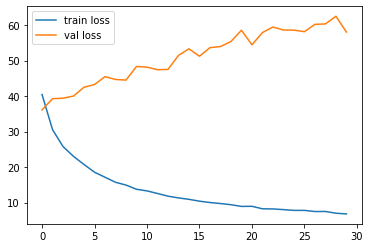

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

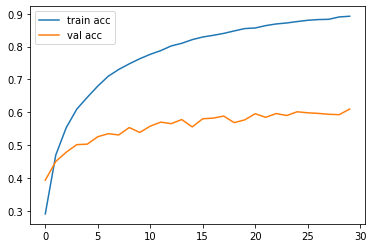

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
model.save('IV3.h5')

In [18]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./IV3.h5',compile=False)

In [19]:
import tensorflow as tf

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('IV3.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpn7o_bqfp\assets


In [21]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [29]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    max_value = np.max(answer)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

In [30]:
img='C:/Users/Asus/Documents/python/images/osd.png'
pic=load_img('C:/Users/Asus/Documents/python/images/osd.png',target_size=(224,224,3))

output(img)

'Parnara spp'